# Contents

1. Common Methods
       
2. Data preprocessing
       
3. Vanilla Auto Encoder
       
4. Deep Autoencoder
       
5. Sparse Auto Encoder

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Input, Dense
from keras.models import Model
#from keras.regularizers import Regularizers
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers

%matplotlib inline

Using TensorFlow backend.


# Common Methods

In [2]:
def show_result(test_imgs, latent_imgs, output_imgs, n=5, latent_img_width=8, latent_img_height=8):
    
    plt.figure(figsize=(n, 4))
    
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1) 
        plt.imshow(test_imgs[i].reshape(28, 28)) 
        plt.gray()
        # display code
        ax = plt.subplot(3, n, i + 1 + n) 
        plt.imshow(latent_imgs[i].reshape(latent_img_width, latent_img_height))
        plt.gray()

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n) 
        plt.imshow(output_imgs[i].reshape(28, 28)) 
        plt.gray()
    plt.show()

In [3]:
def model_history_plot(history):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

# Data preprocessing

In [4]:
# read dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize all values between 0 and 1 and flatten
# the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Vanilla Auto Encoder

In [5]:
### Vanilla net
def getVanillaAE(optimizer='adadelta', loss='mse', epochs=2, verbose=0, plot_history=False):
    
    encodig_dim = 64 
    #inoput layer
    input_layer = Input(shape=(784,))
    #latenet view
    latent_view = Dense(encodig_dim, activation='sigmoid')(input_layer)
    # output layer
    output_layer = Dense(784)(latent_view)
    # model
    model = Model(input_layer, output_layer)
    
    model.summary()
    
    model.compile(optimizer=optimizer, loss=loss)
    
    #fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs, batch_size=256, shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose)
    
    if plot_history == True:
        model_history_plot(fit.history)
    
    
    # Following codes are written for demonstration purpose only
    
    # encoder
    encoder = Model(input_layer, latent_view)
    
    # decoder
    encoded_input = Input(shape=(encodig_dim,))
    decoder_layer = model.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    # encode and decode some digits, taking them from the *test* set 
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    
    return x_test, encoded_imgs, decoded_imgs

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 1s 13us/step - loss: 0.0895 - val_loss: 0.0721
Epoch 2/400
60000/60000 [==============================] - 1s 12us/step - loss: 0.0677 - val_loss: 0.0623
Epoch 3/400
60000/60000 [==============================] - 1s 12us/step - loss: 0.0589 - val_loss: 0.0559
Epoch 4/400
60000/60000 [=========

60000/60000 [==============================] - 1s 10us/step - loss: 0.0216 - val_loss: 0.0216
Epoch 71/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0215 - val_loss: 0.0215
Epoch 72/400
60000/60000 [==============================] - 1s 12us/step - loss: 0.0215 - val_loss: 0.0214
Epoch 73/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0214 - val_loss: 0.0214
Epoch 74/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0213 - val_loss: 0.0213
Epoch 75/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 76/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0212 - val_loss: 0.0212
Epoch 77/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0211 - val_loss: 0.0211
Epoch 78/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0211 - val_loss: 0.0210
Epoch 79/400
60000/60000 [========================

60000/60000 [==============================] - 1s 10us/step - loss: 0.0179 - val_loss: 0.0179
Epoch 147/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0179 - val_loss: 0.0179
Epoch 148/400
60000/60000 [==============================] - 1s 11us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 149/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 150/400
60000/60000 [==============================] - 1s 11us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 151/400
60000/60000 [==============================] - 1s 11us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 152/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 153/400
60000/60000 [==============================] - 1s 11us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 154/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 155/400
60000/60000 [===============

Epoch 222/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 223/400
60000/60000 [==============================] - 1s 11us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 224/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 225/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 226/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 227/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 228/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 229/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 230/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 231/400
60000/60000 [=

60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 299/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 300/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 301/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 302/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 303/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 304/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 305/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 306/400
60000/60000 [==============================] - 1s 9us/step - loss: 0.0161 - val_loss: 0.0162
Epoch 307/400
60000/60000 [======================

60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0160
Epoch 375/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 376/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 377/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 378/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 379/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 380/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 381/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 382/400
60000/60000 [==============================] - 1s 10us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 383/400
60000/60000 [===============

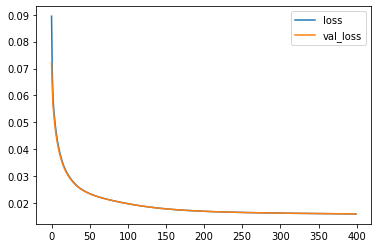

In [12]:
x_test, encoded_imgs, decoded_imgs = getVanillaAE(epochs=400, plot_history=True, verbose=1)

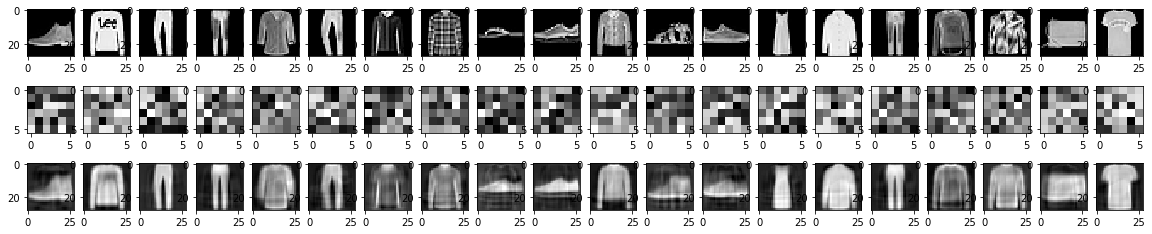

In [10]:
show_result(x_test, encoded_imgs, decoded_imgs, n=20, latent_img_width=6, latent_img_height=6)


# Deep autoencoder

In [5]:
def getDeepAE(epochs=2, verbose=1):
    encodig_dim = 64 
    # input layer
    input_layer = Input(shape=(784,))
    # encoding architecture
    encode_layer1 = Dense(512, activation='relu')(input_layer)
    encode_layer2 = Dense(256, activation='relu')(encode_layer1)
    encode_layer3 = Dense(128, activation='relu')(encode_layer2)
    # latent view
    latent_view = Dense(encodig_dim, activation='sigmoid')(encode_layer3)
    # decoding architecture
    decode_layer1 = Dense(128, activation='relu')(latent_view)
    decode_layer2 = Dense(256, activation='relu')(decode_layer1)
    decode_layer3 = Dense(512, activation='relu')(decode_layer2)
    # output layer
    output_layer = Dense(784)(decode_layer3)
    # model
    model = Model(input_layer, output_layer)

    model.summary()

    model.compile(optimizer='adadelta', loss='mse')

    #fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs,  shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose)


    model_history_plot(fit.history)

    # Following codes are written for demonstration purpose only

    encoder = Model(input_layer, latent_view)
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = model.predict(x_test)
    
    return x_test, encoded_imgs, decoded_imgs




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_______

60000/60000 [==============================] - 5s 80us/step - loss: 0.0431 - val_loss: 0.0428
Epoch 39/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0428 - val_loss: 0.0425
Epoch 40/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.0426 - val_loss: 0.0423
Epoch 41/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0424 - val_loss: 0.0421
Epoch 42/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0422 - val_loss: 0.0419
Epoch 43/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0420 - val_loss: 0.0417
Epoch 44/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0418 - val_loss: 0.0415
Epoch 45/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0417 - val_loss: 0.0414
Epoch 46/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0415 - val_loss: 0.0412
Epoch 47/100
60000/60000 [========================

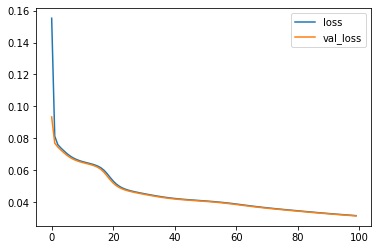

In [6]:
x_test, encoded_imgs, decoded_imgs = getDeepAE(epochs=100)

In [ ]:
show_result(x_test, encoded_imgs, decoded_img, n=20)

# Sparse Auto Encoder

In [ ]:
def getSparseAE(epochs=2, verbose=1):
    # input layer
    input_layer = Input(shape=(784,))
    # encoding architecture
    encode_layer1 = Dense(1024, activation='relu')(input_layer)
    encode_layer2 = Dense(1024, activation='relu')(encode_layer1)
    # latent view
    latent_view = Dense(1024, activation='sigmoid', activity_regularizer=regularizers.l1(1e-5))(encode_layer2)
    # decoding architecture
    decode_layer1 = Dense(1024, activation='relu')(latent_view)
    decode_layer2 = Dense(1024, activation='relu')(decode_layer1)
    # output layer
    output_layer = Dense(784)(decode_layer2)
    # model
    model = Model(input_layer, output_layer)
    
    
    # model.summary()

    model.compile(optimizer='adadelta', loss='mse')

    #fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs,  shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose)


    # model_history_plot(fit.history)

    # Following codes are written for demonstration purpose only

    encoder = Model(input_layer, latent_view)
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = model.predict(x_test)
    
    n = 20
    
    show_result(x_test, encoded_imgs, decoded_imgs, latent_img_width=32, latent_img_height=32)
    
   
    return model

In [ ]:
getSparseAE(epochs=1)

In [ ]:
getSparseAE(epochs=10)